In [1]:
import requests
import pandas as pd
import numpy as np
import fnmatch
import re
from string import Template
import matplotlib.pyplot as plt 
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
##import seaborn as sns

In [2]:
Incidents = pd.read_csv('../data/MetroIncidents.csv', delimiter=',')
df_Incidents=pd.DataFrame(Incidents)
##Incidents1 =df_Incidents[["longitude"]]
##df_Incidents.info() 
pd.set_option('display.max_columns', None)
df_Incidents = df_Incidents.loc[df_Incidents['CRIME'] != 'N']
df_Incidents

,Primary Key,Incident Number,Report Type,Report Type Description,Incident Status Code,Incident Status Description,Investigation Status,Incident Occurred,YEAR OCCURRED,Incident Reported,YEAR REPORTED,Incident Location,Latitude,Longitude,Mapped Location,city,ZIP Code,Zip Code Correct,RPA,Zone,Location Code,Location Description,Offense Number,Offense NIBRS,NIBRSCodeCleaned,CRIME CATEGORY,CRIME,Offense Description,Weapon Primary,Weapon Description,Weapon Category,Victim Number,Domestic Related,Victim Type,Victim Description,Victim Gender,Victim Race,Victim Ethnicity,Victim County Resident
1,20180290646_11,20180290646,D,DISPATCHED,A,CLEARED BY ARREST,CLOSED,2018-03-31 12:21:00.000,2018,2018-03-31 19:41:00.000,2018,5824 5824,36.042,-86.713,POINT (-86.713 36.042),ANTIOCH,37013.0,37013.0,8757.0,331.0,8.0,"DEPARTMENT, DISCOUNT STORE",1.0,NaN,23C,LARCENY/THEFT OFFENSES,NaN,SHOPLIFTING,17.0,NONE,NONE,1,0,B,BUSINESS,NaN,NaN,NaN,NaN
4,20171099391_21,20171099391,D,DISPATCHED,A,CLEARED BY ARREST,CLOSED,2017-12-16 18:30:00.000,2017,2017-12-16 22:44:00.000,2017,1101 1101,36.178,-86.586,POINT (-86.586 36.178),HERMITAGE,37076.0,37076.0,9539.0,523.0,22.0,"RESIDENCE, HOME",2.0,220.0,220,BURGLARY/BREAKING & ENTERING,NaN,BURGLARY- AGGRAVATED,9.0,PERSONAL (HANDS),PERSONAL (HANDS),1,1,I,INDIVIDUAL (18 AND OVER),F,B,NON-HISPANIC,RESIDENT
5,20190792147_11,20190792147,D,DISPATCHED,A,CLEARED BY ARREST,CLOSED,2019-10-28 12:00:00.000,2019,2019-10-30 20:10:00.000,2019,506 506,36.170,-86.779,POINT (-86.779 36.17),NASHVILLE,37201.0,37201.0,4211.0,415.0,15.0,"JAIL, PRISON",1.0,290.0,290,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,NaN,DAMAGE PROP - PUBLIC,9.0,PERSONAL (HANDS),PERSONAL (HANDS),1,0,G,GOVERNMENT,NaN,NaN,NaN,NaN
6,20200019888_11,20200019888,D,DISPATCHED,R,REFUSED TO COOPERATE,CLOSED,2020-01-09 15:35:00.000,2020,2020-01-09 16:31:00.000,2020,400 400,36.214,-86.794,POINT (-86.794 36.214),NASHVILLE,37207.0,37207.0,3039.0,633.0,90.0,APARTMENT,1.0,NaN,13B,ASSAULT OFFENSES,NaN,SIMPLE ASSLT,9.0,PERSONAL (HANDS),PERSONAL (HANDS),1,1,I,INDIVIDUAL (18 AND OVER),F,B,NON-HISPANIC,NON RESIDENT
9,20200532326_11,20200532326,T,NaN,O,OPEN,OPEN,2019-12-15 15:00:00.000,2019,2020-08-18 09:34:00.000,2020,HILLSBORO PIKE,36.100,-86.820,POINT (-86.82 36.1),NASHVILLE,NaN,37215.0,6111.0,113.0,5.0,"COMMERCIAL, OFFICE BUILDING",1.0,270.0,270,EMBEZZLEMENT,NaN,EMBEZZLE - BUSINESS PROP,17.0,NONE,NONE,1,0,B,BUSINESS,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851046,20230458234_11,20230458234,D,DISPATCHED,U,UNFOUNDED,CLOSED,2023-08-05 02:26:00.000,2023,2023-08-05 02:26:00.000,2023,523 523,36.198,-86.782,POINT (-86.782 36.198),NASHVILLE,37207.0,37207.0,NaN,NaN,13.0,"HIGHWAY, ROAD, ALLEY",1.0,240.0,240,MOTOR VEHICLE THEFT,NaN,VEHICLE THEFT,17.0,NONE,NONE,1,0,I,INDIVIDUAL (18 AND OVER),F,U,UNKNOWN,NON RESIDENT
851047,20240001324_22,20240001324,D,DISPATCHED,A,CLEARED BY ARREST,CLOSED,2024-01-01 20:15:00.000,2024,2024-01-01 23:35:00.000,2024,850 850,36.069,-86.679,POINT (-86.679 36.069),ANTIOCH,37013.0,37013.0,NaN,NaN,20.0,"PARKING LOT, GARAGE",2.0,520.0,520,WEAPON LAW VIOLATIONS,NaN,"WEAPON OFFENSE, CRIMINAL ATTEMPT",1.0,HANDGUN,FIREARM,2,0,S,SOCIETY,NaN,NaN,NaN,NaN
851048,20240002126_11,20240002126,D,DISPATCHED,O,OPEN,OPEN,2024-01-01 15:00:00.000,2024,2024-01-02 08:08:00.000,2024,CLEO MILLER DR,36.180,-86.750,POINT (-86.75 36.18),NASHVILLE,NaN,37206.0,NaN,NaN,20.0,"PARKING LOT, GARAGE",1.0,NaN,220,BURGLARY/BREAKING & ENTERING,NaN,BURGLARY- MOTOR VEHICLE,9.0,PERSONAL (HANDS),PERSONAL (HANDS),1,0,I,INDIVIDUAL (18 AND OVER),F,W,NON-HISPANIC,RESIDENT
851050,20240001687_11,20240001687,D,DISPATCHED,O,OPEN,OPEN,2024-01-01 22:00:00.000,2024,2024-01-02 03:10:00.000,2024,MANCHESTER AVE,36.190,-86.840,POINT (-86.84 36.19),NaN,NaN,NaN,NaN,NaN,22.0,"RESIDENCE, HOME",1.0,NaN,23G,LARCENY/THEFT OFFENSES,NaN,LARC - PARTS FROM VEH,17.0,NONE,NONE,1,0,I,INDIVIDUAL (18 AND OVER)

In [3]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
pd.set_option('display.max_columns', None)
print(zipcodes.crs)
zipcodes

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."
5,37143,23,PEGRAM,7047.8267580476522,1900364.756652832,"MULTIPOLYGON (((-87.03553 36.08659, -87.03556 ..."
6,37080,42,JOELTON,2319.8074237329579,56522.611450195313,"MULTIPOLYGON (((-86.86263 36.37811, -86.86264 ..."
7,37221,17,NASHVILLE,241372.3112694624,1266395059.4877319,"MULTIPOLYGON (((-86.97084 36.11644, -86.97084 ..."
8,37072,47,GOODLETTSVILLE,225242.45424953851,1094968706.7701416,"MULTIPOLYGON (((-86.75361 36.40428, -86.75354 ..."
9,37212,54,NASHVILLE,58759.243654332378,73920091.147705078,"MULTIPOLYGON (((-86.80790 36.14643, -86.80605 ..."


In [4]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [5]:
pltmetro = gpd.GeoDataFrame(df_Incidents, 
                            crs = zipcodes.crs, 
                           geometry = gpd.points_from_xy(df_Incidents.Longitude, df_Incidents.Latitude))

In [6]:
type(pltmetro)

geopandas.geodataframe.GeoDataFrame

In [7]:
Incidents_by_zip = gpd.sjoin(pltmetro, zipcodes, predicate = 'within')

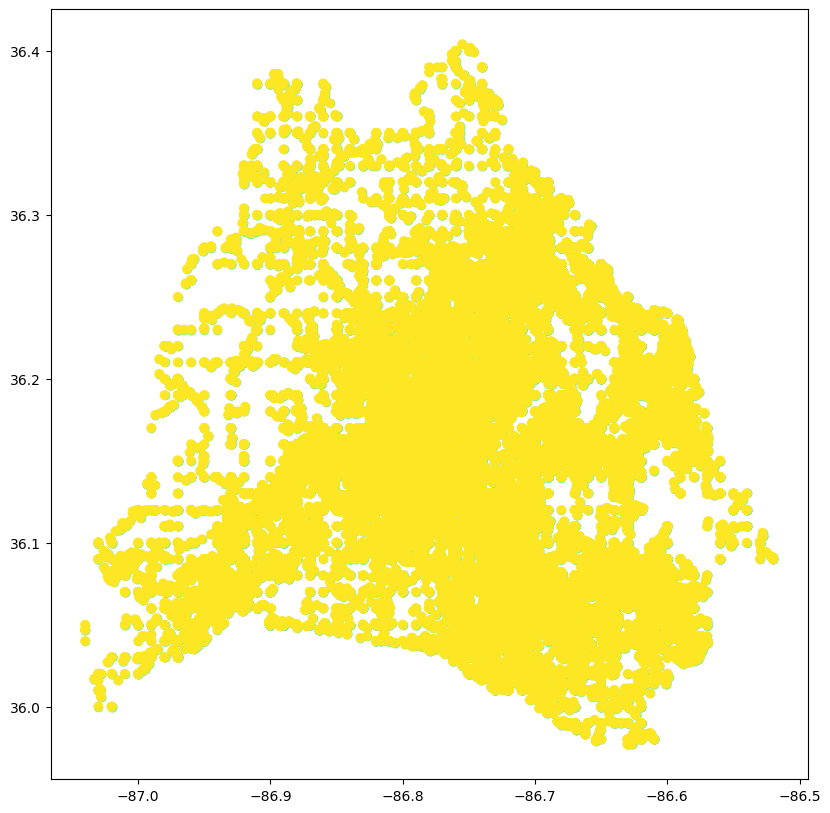

In [8]:
#PLOT INCIDENT#
ax = Incidents_by_zip.plot(figsize = (10, 10), color = 'lightgreen')
Incidents_by_zip.plot( ax = ax, column = 'Incident Number');
plt.show();

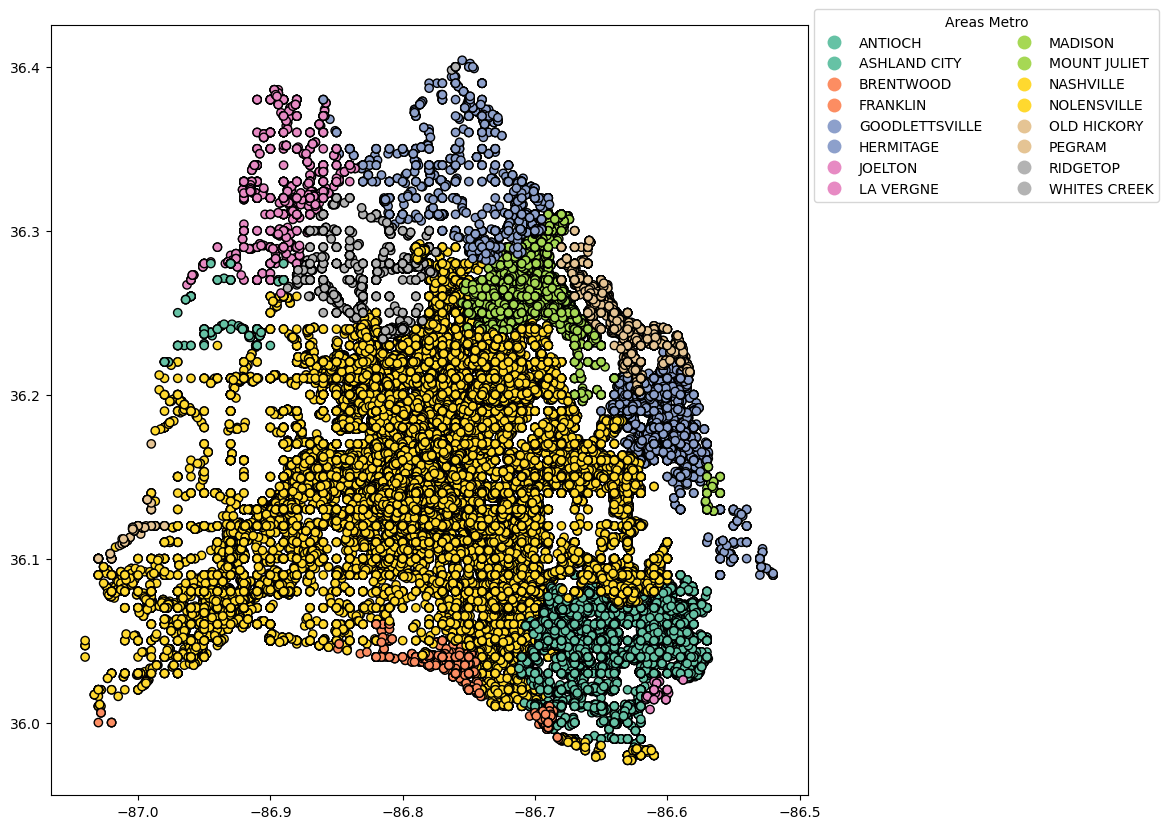

In [16]:
leg_kwds = {'title': 'Areas Metro', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

Incidents_by_zip.plot(column = 'po_name', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [17]:
i = 0
for row_index, row_values in Incidents_by_zip.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 1
values are:
 
Primary Key                                20180290646_11
Incident Number                               20180290646
Report Type                                             D
Report Type Description                        DISPATCHED
Incident Status Code                                    A
Incident Status Description             CLEARED BY ARREST
Investigation Status                               CLOSED
Incident Occurred                 2018-03-31 12:21:00.000
YEAR OCCURRED                                        2018
Incident Reported                 2018-03-31 19:41:00.000
YEAR REPORTED                                        2018
Incident Location                               5824 5824
Latitude                                           36.042
Longitude                                         -86.713
Mapped Location                    POINT (-86.713 36.042)
city                                              ANTIOCH
ZIP Code                                       

In [9]:
davidsonco = gpd.read_file('../data/Davidson County Border.geojson')
print(davidsonco.crs)
davidsonco

EPSG:4326


,area_sq_mi,objectid,shape_area,shape_len,geometry
0,525,4,14641027913.6,686109.334953,"MULTIPOLYGON (((-86.52704 36.13598, -86.52914 ..."
1,0,3,675823.52,3786.70930403,"MULTIPOLYGON (((-86.52315 36.13876, -86.52288 ..."


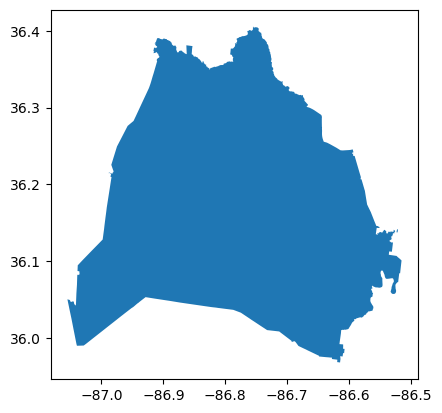

In [10]:
davidsonco.plot();

In [11]:
#Get NeighboorhoodBoundries
nhood = gpd.read_file('../data/Neighborhood Association Boundaries.geojson')
pd.set_option('display.max_rows', None)
#print(nhood.crs)
nhood.sort_values('name', ascending = True)

,name,geometry
107,Amber Hills,"MULTIPOLYGON (((-86.95413 36.05504, -86.95399 ..."
239,Arden Place,"MULTIPOLYGON (((-86.80540 36.09899, -86.80425 ..."
193,Asheford Crossing,"MULTIPOLYGON (((-86.63049 36.04358, -86.63003 ..."
37,Ashley Green,"MULTIPOLYGON (((-86.93049 36.07396, -86.93148 ..."
236,Avalon,"MULTIPOLYGON (((-86.79311 36.10961, -86.79328 ..."
285,Avondale Park,"MULTIPOLYGON (((-86.98693 36.07718, -86.98672 ..."
252,Baltic Bunch,"MULTIPOLYGON (((-86.62111 36.19176, -86.62075 ..."
159,Banbury Crossing,"MULTIPOLYGON (((-86.75279 36.02586, -86.75139 ..."
237,Battlemont,"MULTIPOLYGON (((-86.79855 36.11579, -86.79848 ..."
221,Bayview,"MULTIPOLYGON (((-86.63215 36.09683, -86.63144 ..."


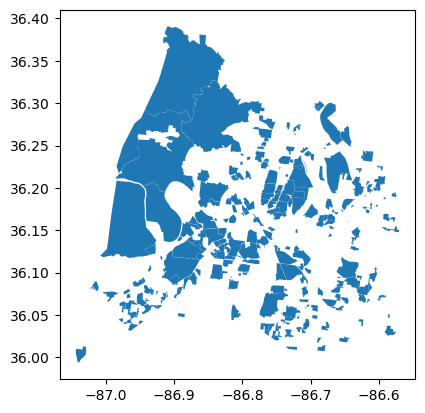

In [12]:
#NeighboorhoodBoundries
nhood.plot();

In [18]:
nhood = nhood[['name', 'geometry']]

In [20]:
plthood = gpd.GeoDataFrame(df_Incidents, 
                            crs = nhood.crs, 
                           geometry = gpd.points_from_xy(df_Incidents.Longitude, df_Incidents.Latitude))

In [22]:
Incidents_by_hood = gpd.sjoin(plthood, nhood, predicate = 'within')

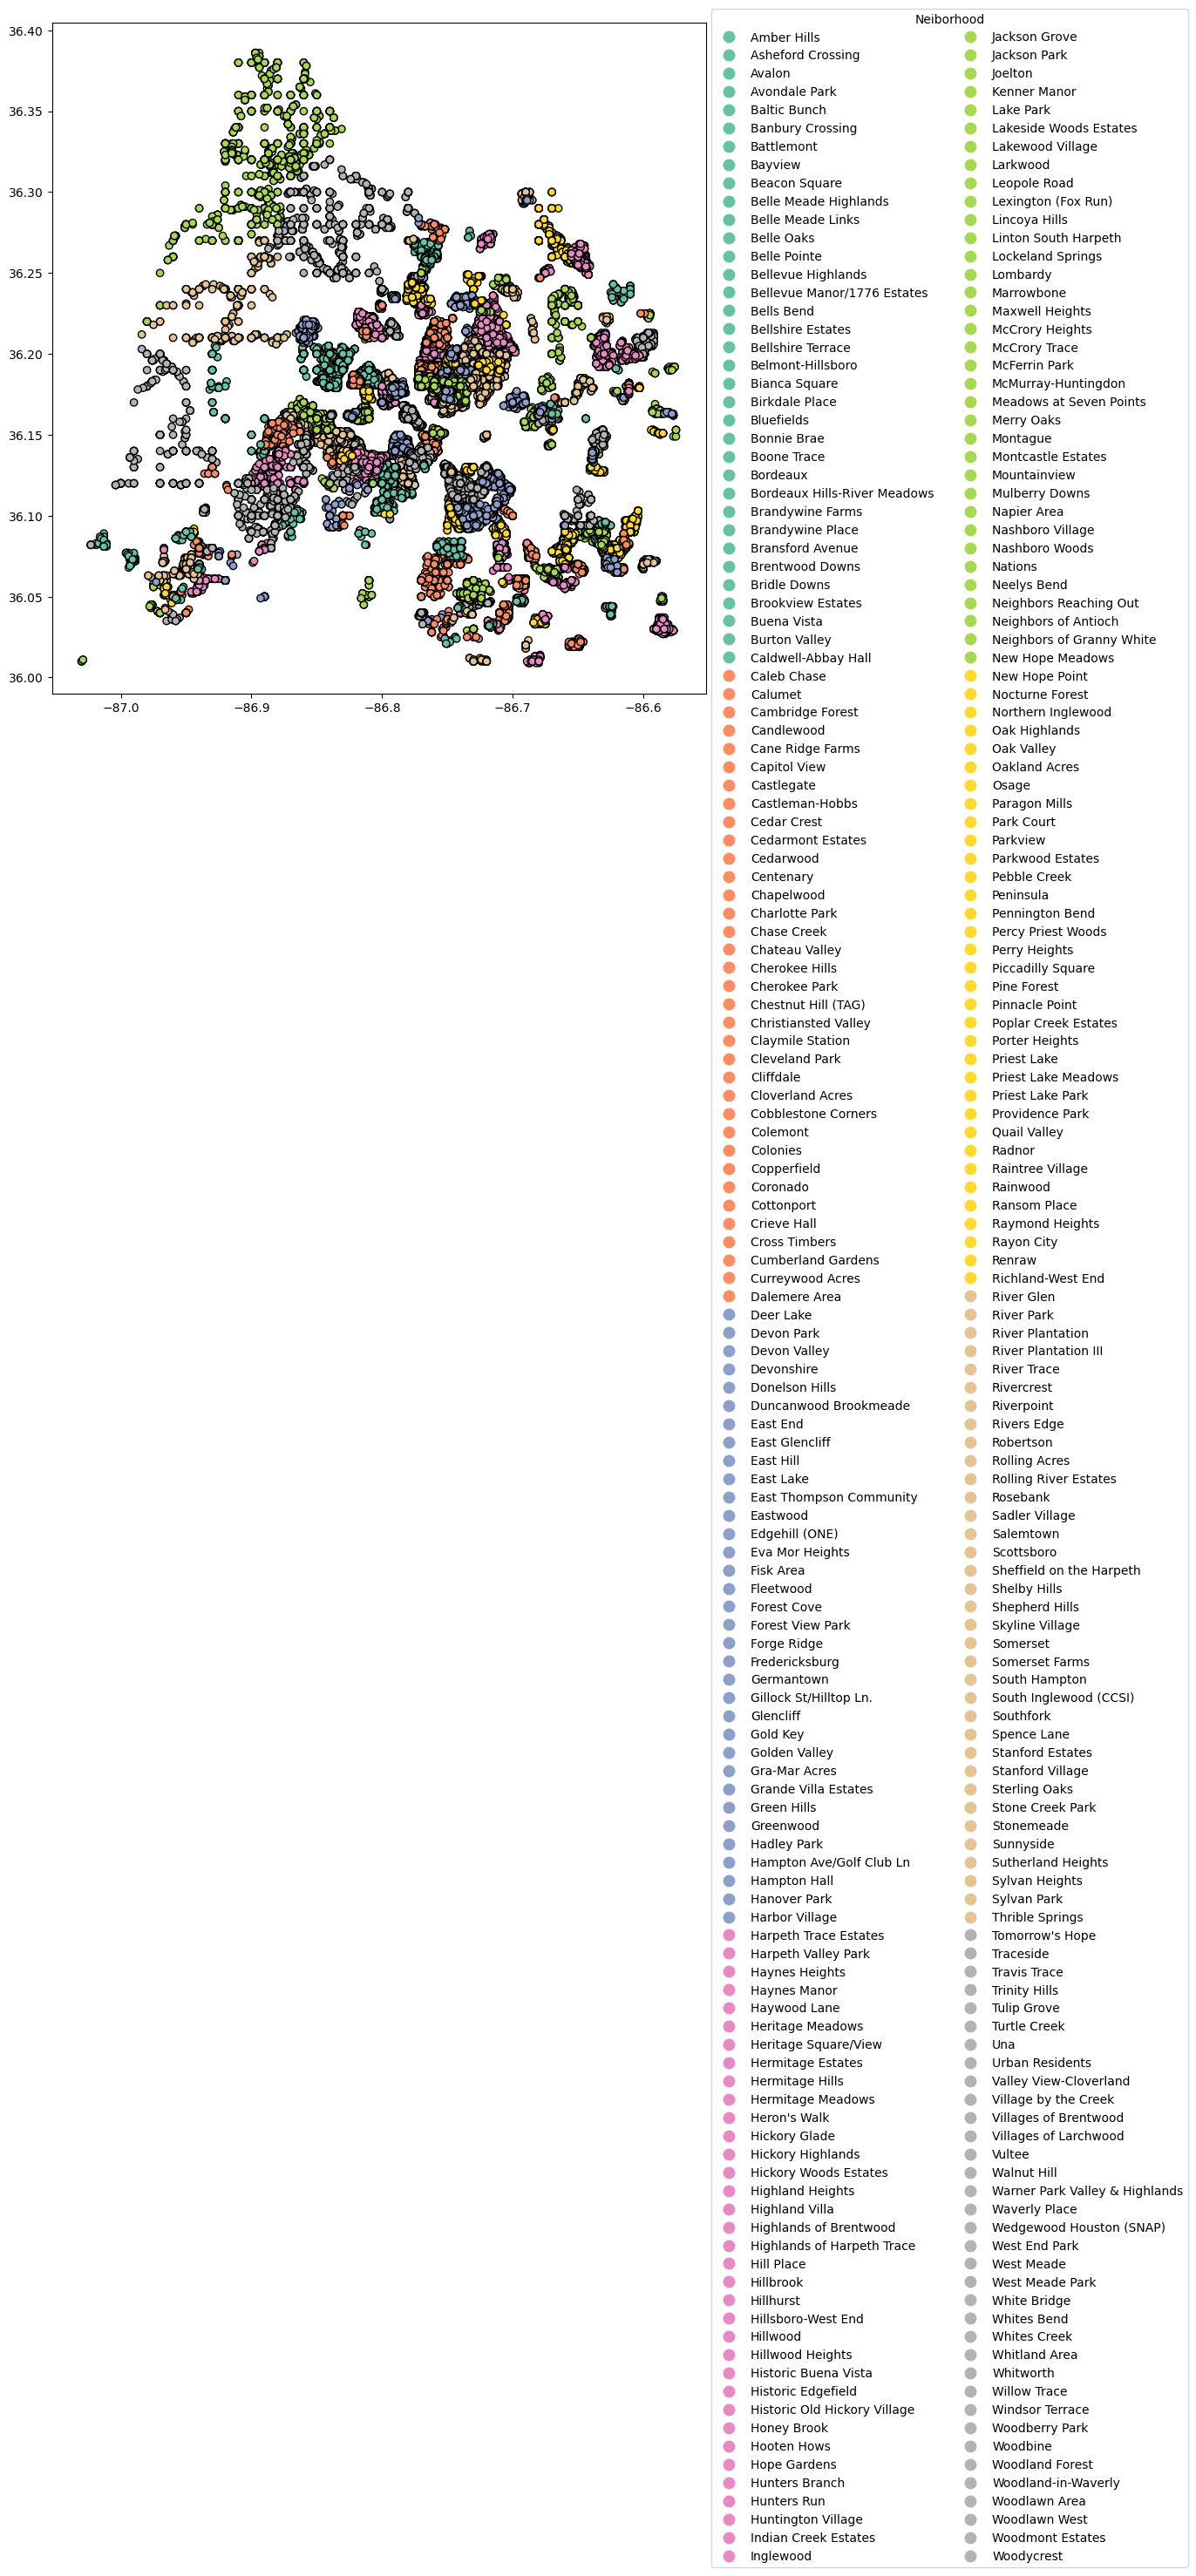

In [24]:
leg_kwds = {'title': 'Neiborhood', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

Incidents_by_hood.plot(column = 'name', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()